<a href="https://colab.research.google.com/github/danny111315/Beginner_of_Data_Science/blob/main/%5B%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%85%A5%E9%96%80%5D%5BCH5%5D%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **此Notebook為增進基礎實力而建制的練習筆記本**

# **5.1 資料清理**

## **5.1.1 簡介**

**資料清理的重要性**

資料清理是非常重要的過程，「Garbage in, garbase out」，


數據清理可以讓我們理解內在特徵，發現潛在模式，進而做出決策，如果不做會導致：



*   **分析不準確**

*   **模型訓練不穩定**

*   **浪費時間資源**





**資料品質的問題**

巨量資料存在缺失值、重複值、錯誤的數值或格式



*   **資料不一致性**

*   **資料不完整性**

*   **不準確性**

**資料清理步驟**

*   **檢查格式型別**

*   **檢查資料完整性**

*   **處理缺失值**

*   **處理重複值**

*   **檢查資料一致性與準確性**

*   **資料轉換和處理**



## **5.1.2 資料過濾**

In [ ]:
#184. 條件過濾 (過濾列)

import pandas as pd

data = {'Age':[25,30,35,40,45],
     'Gender':['M','F','M','F','M'],
     'Income':[50000,55000,60000,65000,70000]
        }

df = pd.DataFrame(data)

#條件過濾:選擇年齡大於30的資料
filtered_data = df[df['Age']>30]
filtered_data

#185. 也可以用query()
filtered_data = df.query('Age>30')
filtered_data

,Age,Gender,Income
2,35,M,60000
3,40,F,65000
4,45,M,70000


In [ ]:
#185. 特徵過濾. (過濾欄)

import pandas as pd

data = {'Age':[25,30,35,40,45],
     'Gender':['M','F','M','F','M'],
     'Income':[50000,55000,60000,65000,70000]
        }

df = pd.DataFrame(data)

#特徵過濾:選擇年齡和收入特徵
selected_features = df[['Age','Income']]
selected_features

#也可以使用drop()方法移除不需要的特徵
filtered_data = df.drop(columns=["Gender"], axis=1)
filtered_data




,Age,Income
0,25,50000
1,30,55000
2,35,60000
3,40,65000
4,45,70000


In [ ]:
# 186. 資料抽樣
ddata = {'Age':[25,30,35,40,45],
     'Gender':['M','F','M','F','M'],
     'Income':[50000,55000,60000,65000,70000]
        }
df = pd.DataFrame(data)

#資料抽樣:隨機選擇3樣本
sampled_data = df.sample(n =3)
sampled_data

,Age,Gender,Income
2,35,M,60000
3,40,F,65000
0,25,M,50000


## **5.1.3 缺失值處理**

### **缺失值的種類**

動手處理缺失值之前，須對缺失值產生原因做判斷

因為會影響不同的處理方式

##    **完全隨機缺失**

    *體重、身高、年齡，缺體重(無關)*

    **統計值填充：**  
    
    **優：** *代表整組資料狀況*
    
    **缺：** *受極端值影響、代表性不足*
    *   平均值
    *   中位數
    *   內插值(連續數中間)

*   **隨機缺失**

    *收入、年齡、教育程度，缺收入(有關)*

    **依賴模型填充：**  
    
    **優：** *填充值具多樣性*
    
    **缺：** *欄位關係不確定、缺失資料對模型效果影響甚大*

    *   KNN
    *   RandomForest
    *   BayesModel

*   **非隨機缺失**

    *顧客評價 ，缺評價*

    **dummy、人工標註、刪除資料：**

In [ ]:
import pandas as pd
import numpy as np

data = {'Age':[25,30,35,40,np.nan],
     'Gender':['M','F','M','np.nan','M'],
     'Income':[50000,55000,np.nan,65000,70000]
        }
df = pd.DataFrame(data)

#187.檢測缺失值
missing_values = df.isnull()
missing_values

,Age,Gender,Income
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,False
4,True,False,False


In [ ]:
#188. 刪除缺失值資料
df_drop = df.dropna()
df_drop

,Age,Gender,Income
0,25.0,M,50000.0
1,30.0,F,55000.0
3,40.0,np.nan,65000.0


In [ ]:
#189. 使用平均值填充

numberic_cols = df.select_dtypes(include=np.number).columns
df_filled = df[numberic_cols].fillna(df[numberic_cols].mean())
df_filled

,Age,Income
0,25.0,50000.0
1,30.0,55000.0
2,35.0,60000.0
3,40.0,65000.0
4,32.5,70000.0


In [ ]:
#190. 差值法

df_interpolated = df.interpolate()
df_interpolated


<ipython-input-8-e883ffd2c45c>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate()


,Age,Gender,Income
0,25.0,M,50000.0
1,30.0,F,55000.0
2,35.0,M,60000.0
3,40.0,np.nan,65000.0
4,40.0,M,70000.0


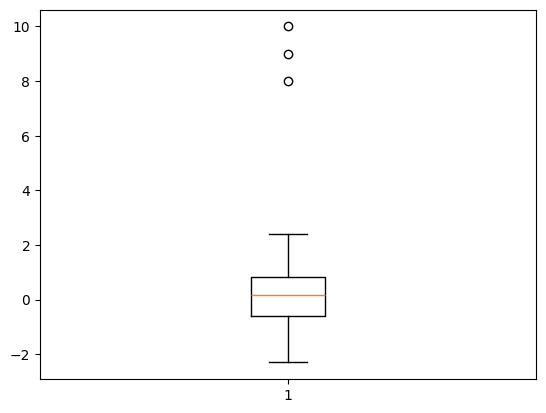

In [ ]:
#191. 箱型圖找離群值
import numpy as np
import matplotlib.pyplot as plt

data = np.concatenate((np.random.normal(0,1,100),np.array([8,9,10]))) #192. 生成離群值資料

#繪製箱型圖

plt.boxplot(data)
plt.show()



In [ ]:
#193. 統計判斷離群值

import numpy as np

data = np.concatenate((np.random.normal(0,1,100),np.array([8,9,10])))

mean = np.mean(data)
std = np.std(data)

#設定離群值判斷閥值(通常為平均值+- 2倍標準差)
threshold = 2 * std

#檢測離群值
outliers = data[(data < mean - threshold)|(data > mean + threshold)]

print("離群值:",outliers)

離群值: [ 8.  9. 10.]


In [ ]:
#194. 離群值處理方法
data = np.concatenate((np.random.normal(0,1,100),np.array([8,9,10])))

mean = np.mean(data)
std = np.std(data)

threshold = 2 * std

outliers = data[(data < mean - threshold)|(data > mean + threshold)]

# 刪除

data_without_outliers = data[(data>=mean - threshold) & (data <= mean +threshold)]

data_filled = data.copy()
data_filled[(data<mean - threshold)|(data>mean + threshold)]


array([ 8.,  9., 10.])